In [1]:
%load_ext autoreload
%autoreload 2

# Preprocesamiento y contextualización

## Lectura

Información de archivos

Datos extraidos de https://www.kaggle.com/dalpozz/creditcardfraud

In [2]:
import os 
directory = '../Default Credit Card'
filefull = 'creditcard.csv'
filepath = os.path.join(directory, filefull)

Explorar primeras lineas del archivo

In [3]:
from utils.read import explore_csv
explore_csv(filepath, lines=4)

"Time","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount","Class"

0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62,"0"

0,1.19185711131486,0.26615071205963,0.16648011335321,0.448154078460911,0.0600176492822243,-0.0823608088155687,-0.0788029833323113,0.0851016549148104,-0.255425128109186,-0.166974414004614,1.61272666105479,1.06523531137287,0.48909501589608,-0.143772296441519,0.635558093258208,0.46391704

Leer informacion

In [4]:
import pandas as pd
data = pd.read_csv(filepath)
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [45]:
data.describe()
5//2

2

# Detección no supervisada de Outliers

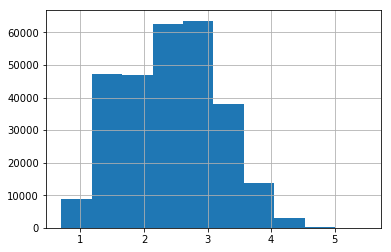

In [21]:
import numpy as np
import matplotlib.pyplot as plt
np.log10(12 * data['Amount'] + 5).hist()
plt.show()
data['logamount'] = np.log10(data['Amount'] + 1)

Selección de datos:

In [22]:
import numpy as np
cols = ['V{}'.format(i) for i in range(1, 29)] + ['logamount']
X = data[cols].values
y = data['Class'].values

In [38]:
perfraud = 1.0 * sum(y == 1) / len(y)
print('Porcentaje de fraudes: ', '{:.2%}'.format(perfraud))

Porcentaje de fraudes:  0.17%


Estandarización:

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
Xst = scaler.transform(X)

Reduccion de independencia lineal:

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
Xr = pca.fit_transform(Xst)
pca.explained_variance_

array([ 1.62173832,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ])

Muestra de datos:

In [27]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(Xr, y, train_size=0.2)

In [29]:
print('Total fraudes en la muestra: ', sum(ytrain))

Total fraudes en la muestra:  104


Estandarización

In [30]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(Xtrain)
XX = scaler.transform(Xtrain)

Outliers (1 cluster):

In [33]:
from utils.clust import outliers, outrate
out = outliers(Xtrain, contamination=perfraud*20, Nclusters=1)
outrate(out, ytrain)

TPR: 78.846% 
 FPR: 3.317%


Outliers (2 clusters):

In [41]:
from utils.clust import outliers, outrate
out = outliers(Xtrain, contamination=perfraud*20, Nclusters=2)
outrate(out, ytrain)


TPR: 0.000% 
 FPR: 3.129%


Outliers (3 clusters):

In [177]:
from utils.clust import outliers, outrate
out = outliers(Xtrain, contamination=perfraud*20, Nclusters=3)
outrate(out, ytrain)

TPR: 7.143% 
 FPR: 1.479%


Outliers (4 clusters):

In [178]:
from utils.clust import outliers, outrate
out = outliers(Xtrain, contamination=perfraud*20, Nclusters=4)
outrate(out, ytrain)

TPR: 2.041% 
 FPR: 0.893%


In [39]:
%install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py

ERROR:root:Line magic function `%install_ext` not found.
